In [1]:
import segmentation_models_pytorch as smp
from trainer import Trainer

# Training

In [2]:
def TRAIN(MODEL, ENCODER, OPTIMIZER, LOSS):
    if(MODEL == 'Unet'):
        model = smp.Unet(ENCODER, encoder_weights='imagenet', classes=5, activation=None)
    elif(MODEL == 'FPN'):
        model = smp.FPN(ENCODER, encoder_weights='imagenet', classes=5, activation=None)
    elif(MODEL == 'Linknet'):
        model = smp.Linknet(ENCODER, encoder_weights='imagenet', classes=5, activation=None)
    
    model_trainer = Trainer(model = model, optim = OPTIMIZER, loss = LOSS, lr = 1e-3, bs = 8, name = ENCODER+'_'+MODEL+'_'+LOSS+'_'+OPTIMIZER)
    model_trainer.seed_everything(43)
    model_trainer.do_cutmix = False
    model_trainer.freeze()
    model_trainer.change_loader(crop_type=0, shape=512)
    model_trainer.fit(10)
    model_trainer.do_cutmix = True
    model_trainer.unfreeze()
    model_trainer.change_loader(crop_type=0, shape=512)
    model_trainer.fit(20)
    model_trainer.do_cutmix = True
    model_trainer.unfreeze()
    model_trainer.change_loader(crop_type=1, shape=512)
    model_trainer.fit(20)
    model_trainer.do_cutmix = False
    model_trainer.freeze()
    model_trainer.change_loader(crop_type=1, shape=512)
    model_trainer.fit(5)

In [3]:
# Accordingly append to the list and train multiple models
# Naming has also been adjusted 
# ['Ranger','Over9000'] * ['Dice', 'BCE+DICE', 'BCE+DICE+JACCARD']
Model = ['FPN']
Encoder = ['efficientnet-b4']
Optimizer = ['Ranger', 'Over9000']
Loss = ['DICE', 'BCE+DICE', 'BCE', 'BCE+DICE+JACCARD']
for model in Model:
    for encoder in Encoder:
        for optimizer in Optimizer:
            for loss in Loss:
                TRAIN(model, encoder, optimizer, loss)

# Testing

In [17]:
model = smp.FPN('efficientnet-b4', encoder_weights='imagenet', classes=5, activation=None)
model_trainer =Trainer(model = model, optim = 'Ranger', loss = 'BCE+DICE', lr = 1e-3, bs = 8, name = 'none')
model_trainer.load_model('efficientnet-b4_FPN_BCE+DICE_Over9000_best_dice.pth')

Loaded model with dice:  0.38162363408233785


In [18]:
model_trainer.predict()

Starting epoch: 1 | phase: test | ⏰: 07:37:05



Done


In [19]:
import tifffile as tif

In [20]:
sam = tif.imread('../EndoCV2020_testSubmission/semantic_masks/EAD2020_S10_23.tif')

In [21]:
sam.shape

(1080, 1351, 5)

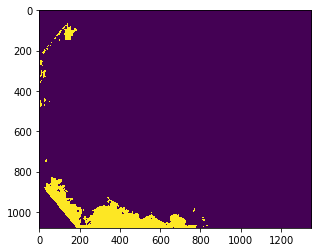

In [27]:
import matplotlib.pyplot as plt
plt.imshow(sam[:,:,4])